In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.shape

(404290, 6)

In [5]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [6]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [7]:
df = df.dropna(subset=['question1','question2'])

In [8]:
new_df = df.sample(30000, random_state=2)

In [9]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
331535,331535,169053,295926,How can I learn Norwegian?,What is the quickest way to learn Norwegian?,1
45407,45407,81383,81384,How are currency rates determined?,Where and how are exchange rates determined?,1
286200,286200,285024,406729,What is substitution?,What is a substitute for caciocavallo?,0
157195,157195,245856,245857,How can I make iPhone 4s faster with IOS 9.2?,I have an iPhone 4S. How do I make it faster a...,1
154346,154346,242075,242076,How can I help my girlfriend cope with her par...,What can I do to help my girlfriend through he...,1


In [10]:
new_df.duplicated().sum()

0

0    18834
1    11166
Name: is_duplicate, dtype: int64
0    62.78
1    37.22
Name: is_duplicate, dtype: float64


<AxesSubplot:>

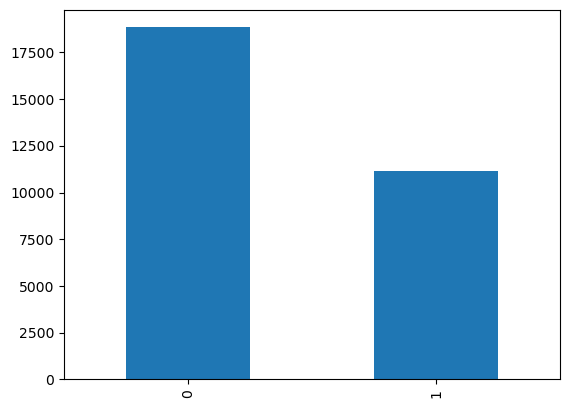

In [11]:
print(new_df['is_duplicate'].value_counts())
print((new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100)
new_df['is_duplicate'].value_counts().plot(kind='bar')

In [12]:
qid = pd.Series(new_df['qid1'].tolist() + new_df['qid2'].tolist())
print("No. of unique questions: ", np.unique(qid).shape[0])
x = qid.value_counts() > 1
print("No. of questions repeated: ", x[x].shape[0])

No. of unique questions:  55311
No. of questions repeated:  3485


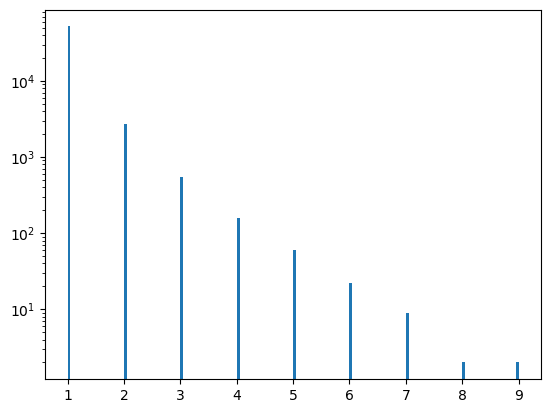

In [13]:
plt.hist(qid.value_counts().values, bins=160)
plt.yscale('log')
plt.show()

In [14]:
new_df['q1_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df['question2'].str.len()    

In [15]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
331535,331535,169053,295926,How can I learn Norwegian?,What is the quickest way to learn Norwegian?,1,26,44
45407,45407,81383,81384,How are currency rates determined?,Where and how are exchange rates determined?,1,34,44
286200,286200,285024,406729,What is substitution?,What is a substitute for caciocavallo?,0,21,38
157195,157195,245856,245857,How can I make iPhone 4s faster with IOS 9.2?,I have an iPhone 4S. How do I make it faster a...,1,45,73
154346,154346,242075,242076,How can I help my girlfriend cope with her par...,What can I do to help my girlfriend through he...,1,59,64


In [16]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))

In [17]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
331535,331535,169053,295926,How can I learn Norwegian?,What is the quickest way to learn Norwegian?,1,26,44,5,8
45407,45407,81383,81384,How are currency rates determined?,Where and how are exchange rates determined?,1,34,44,5,7
286200,286200,285024,406729,What is substitution?,What is a substitute for caciocavallo?,0,21,38,3,6
157195,157195,245856,245857,How can I make iPhone 4s faster with IOS 9.2?,I have an iPhone 4S. How do I make it faster a...,1,45,73,10,16
154346,154346,242075,242076,How can I help my girlfriend cope with her par...,What can I do to help my girlfriend through he...,1,59,64,11,12


In [22]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(w1 & w2)

In [30]:
new_df['words_common'] = new_df.apply(common_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,words_total,words_common
331535,331535,169053,295926,How can I learn Norwegian?,What is the quickest way to learn Norwegian?,1,26,44,5,8,2,13,13,2
45407,45407,81383,81384,How are currency rates determined?,Where and how are exchange rates determined?,1,34,44,5,7,4,12,12,4
286200,286200,285024,406729,What is substitution?,What is a substitute for caciocavallo?,0,21,38,3,6,2,9,9,2
157195,157195,245856,245857,How can I make iPhone 4s faster with IOS 9.2?,I have an iPhone 4S. How do I make it faster a...,1,45,73,10,16,5,25,25,5
154346,154346,242075,242076,How can I help my girlfriend cope with her par...,What can I do to help my girlfriend through he...,1,59,64,11,12,8,23,23,8


In [31]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return (len(w1) + len(w2))

In [32]:
new_df['words_total'] = new_df.apply(total_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,words_total,words_common
331535,331535,169053,295926,How can I learn Norwegian?,What is the quickest way to learn Norwegian?,1,26,44,5,8,2,13,13,2
45407,45407,81383,81384,How are currency rates determined?,Where and how are exchange rates determined?,1,34,44,5,7,4,12,12,4
286200,286200,285024,406729,What is substitution?,What is a substitute for caciocavallo?,0,21,38,3,6,2,9,9,2
157195,157195,245856,245857,How can I make iPhone 4s faster with IOS 9.2?,I have an iPhone 4S. How do I make it faster a...,1,45,73,10,16,5,25,25,5
154346,154346,242075,242076,How can I help my girlfriend cope with her par...,What can I do to help my girlfriend through he...,1,59,64,11,12,8,23,23,8


In [39]:
new_df['words_share'] = round(new_df['words_common']/new_df['words_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,words_total,words_common,words_share
331535,331535,169053,295926,How can I learn Norwegian?,What is the quickest way to learn Norwegian?,1,26,44,5,8,13,2,0.15
45407,45407,81383,81384,How are currency rates determined?,Where and how are exchange rates determined?,1,34,44,5,7,12,4,0.33
286200,286200,285024,406729,What is substitution?,What is a substitute for caciocavallo?,0,21,38,3,6,9,2,0.22
157195,157195,245856,245857,How can I make iPhone 4s faster with IOS 9.2?,I have an iPhone 4S. How do I make it faster a...,1,45,73,10,16,25,5,0.20
154346,154346,242075,242076,How can I help my girlfriend cope with her par...,What can I do to help my girlfriend through he...,1,59,64,11,12,23,8,0.35


minimum letters:  1
maximum letters:  315
average letters: 59


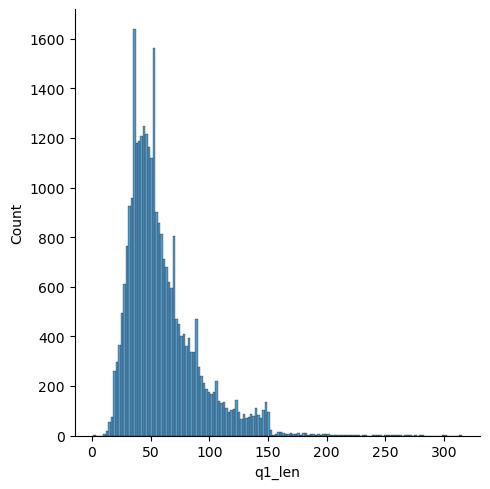

In [41]:
sns.displot(new_df['q1_len'])
print('minimum letters: ', new_df['q1_len'].min())
print('maximum letters: ', new_df['q1_len'].max())
print('average letters:', int(new_df['q1_len'].mean()))

minimum letters:  10
maximum letters:  1169
average letters: 60


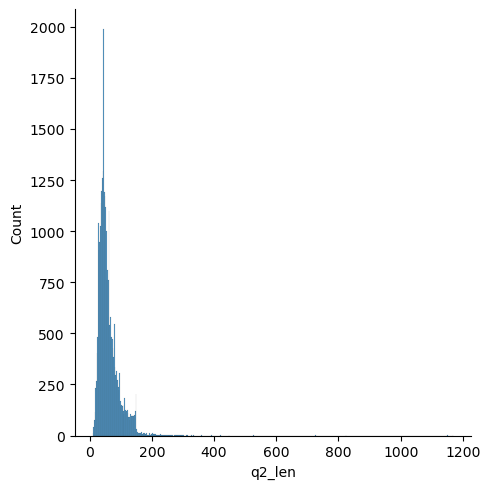

In [42]:
sns.displot(new_df['q2_len'])
print('minimum letters: ', new_df['q2_len'].min())
print('maximum letters: ', new_df['q2_len'].max())
print('average letters:', int(new_df['q2_len'].mean()))

minimum words 1
maximum words 64
average num of words 10


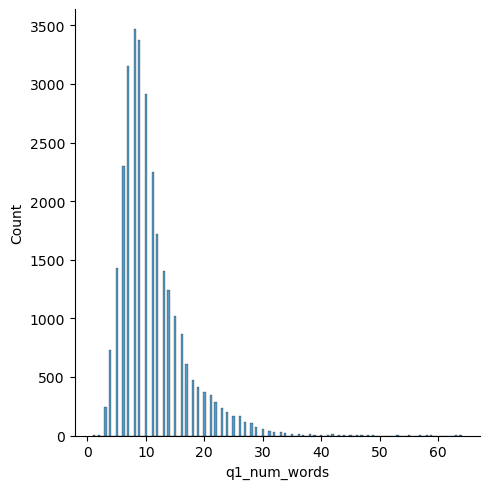

In [43]:
sns.displot(new_df['q1_num_words'])
print('minimum words',new_df['q1_num_words'].min())
print('maximum words',new_df['q1_num_words'].max())
print('average num of words',int(new_df['q1_num_words'].mean()))

minimum words 2
maximum words 237
average num of words 11


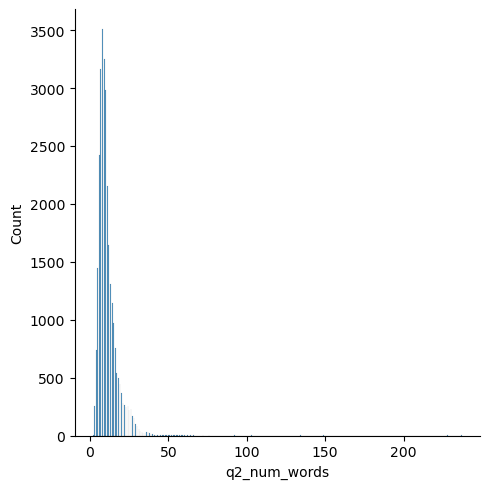

In [44]:
sns.displot(new_df['q2_num_words'])
print('minimum words',new_df['q2_num_words'].min())
print('maximum words',new_df['q2_num_words'].max())
print('average num of words',int(new_df['q2_num_words'].mean()))

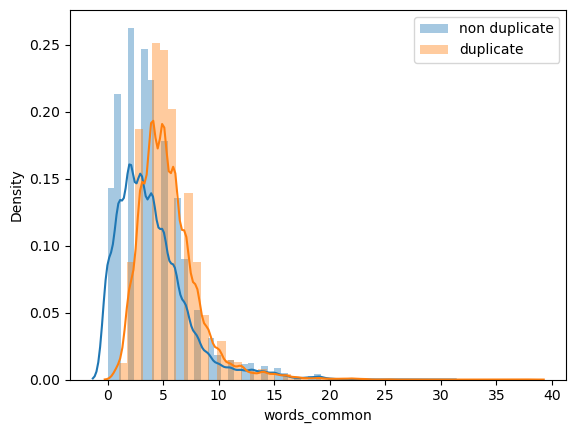

In [49]:
sns.distplot(new_df[new_df['is_duplicate'] == 0]['words_common'], label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['words_common'], label='duplicate')
plt.legend()
plt.show()

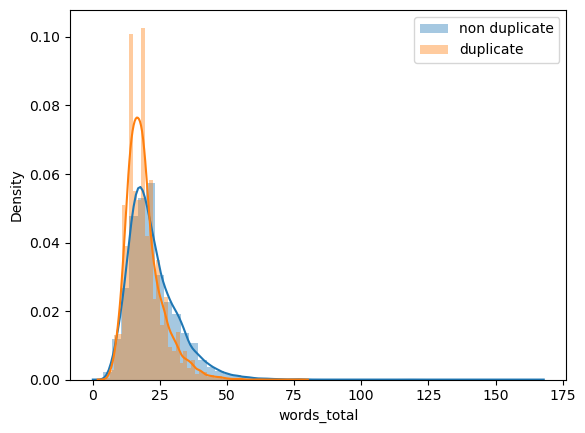

In [50]:
sns.distplot(new_df[new_df['is_duplicate'] == 0]['words_total'], label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['words_total'], label='duplicate')
plt.legend()
plt.show()

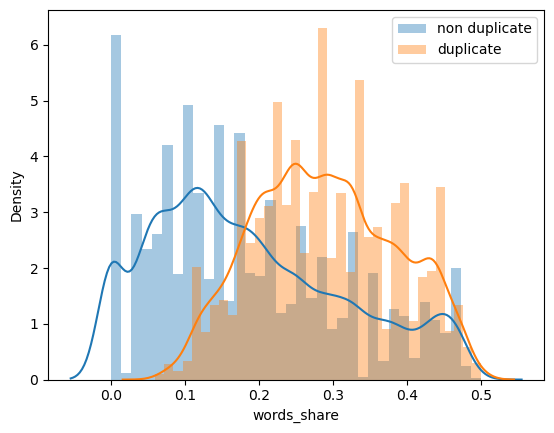

In [52]:
sns.distplot(new_df[new_df['is_duplicate'] == 0]['words_share'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['words_share'],label='duplicate')
plt.legend()
plt.show()

In [53]:
ques_df = new_df[['question1', 'question2']]
ques_df.head()

,question1,question2
331535,How can I learn Norwegian?,What is the quickest way to learn Norwegian?
45407,How are currency rates determined?,Where and how are exchange rates determined?
286200,What is substitution?,What is a substitute for caciocavallo?
157195,How can I make iPhone 4s faster with IOS 9.2?,I have an iPhone 4S. How do I make it faster a...
154346,How can I help my girlfriend cope with her par...,What can I do to help my girlfriend through he...


In [54]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,words_total,words_common,words_share
331535,1,26,44,5,8,13,2,0.15
45407,1,34,44,5,7,12,4,0.33
286200,0,21,38,3,6,9,2,0.22
157195,1,45,73,10,16,25,5,0.20
154346,1,59,64,11,12,23,8,0.35


In [56]:
from sklearn.feature_extraction.text import CountVectorizer

questions = list(ques_df['question1']) + list(ques_df['question1'])

cv = CountVectorizer(max_features = 3000)

q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [61]:
temp_df1 = pd.DataFrame(q1_arr, index = ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index = ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [63]:
final_df = pd.concat([final_df, temp_df], axis = 1)
print(final_df.shape)
final_df.head()

(30000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,words_total,words_common,words_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
331535,1,26,44,5,8,13,2,0.15,0,0,...,0,0,0,0,0,0,0,0,0,0
45407,1,34,44,5,7,12,4,0.33,0,0,...,0,0,0,0,0,0,0,0,0,0
286200,0,21,38,3,6,9,2,0.22,0,0,...,0,0,0,0,0,0,0,0,0,0
157195,1,45,73,10,16,25,5,0.20,0,0,...,0,0,0,0,0,0,0,0,0,0
154346,1,59,64,11,12,23,8,0.35,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(final_df.iloc[:,1:].values, final_df.iloc[:,0].values, test_size=0.2, random_state=1)

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
Y_pred = rf.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.7621666666666667

In [68]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
rf.fit(X_train, Y_train)
Y_pred = rf.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.7613333333333333